In [8]:

import tensorflow as tf
import numpy as np

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.12.0


In [9]:

# Examples
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)

# Labels
y = np.array([[0],
              [1],
              [1],
              [0]], dtype=np.float32)

In [10]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid, kernel_initializer=tf.initializers.Constant(0.5)))
model.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=['mse', 'binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x, y, batch_size=1, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 5ms/step - loss: 0.3151 - mse: 0.3151 - binary_accuracy: 0.5000
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2605 - mse: 0.2605 - binary_accuracy: 0.5000
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2553 - mse: 0.2553 - binary_accuracy: 0.2500
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2590 - mse: 0.2590 - binary_accuracy: 0.5000
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2523 - mse: 0.2523 - binary_accuracy: 0.5000
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2522 - mse: 0.2522 - binary_accuracy: 0.5000
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2515 - mse: 0.2515 - binary_accuracy: 0.7500
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2513 - mse: 0.2513 - binary_accuracy: 0.7500
Epoch 9/500
4/4 [==============================] - 0s 

In [12]:
predictions = model.predict_on_batch(x)
print(predictions)

[[0.01786479]
 [0.9748645 ]
 [0.9748659 ]
 [0.04356622]]


2023-08-17 12:17:15.779716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [4,2]
	 [[{{node Placeholder/_0}}]]


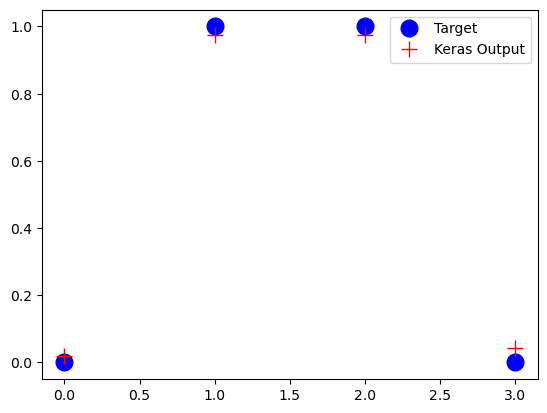

In [13]:
import matplotlib.pyplot as plt
plt.plot(y, 'bo', label='Target', linewidth=2, markersize=12)
plt.plot(predictions, 'r+', label='Keras Output', linewidth=2, markersize=12)
plt.legend(loc='upper right')
plt.show()